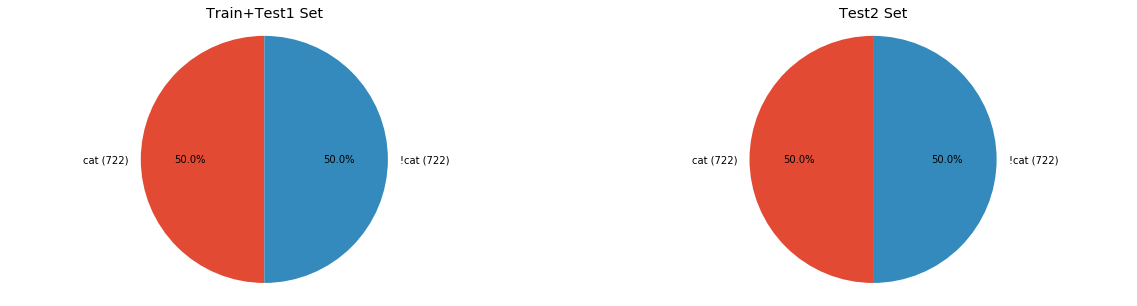

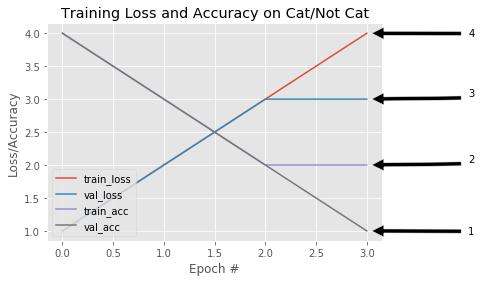

Confusion matrix, without normalization
[[0 1]
 [1 0]]


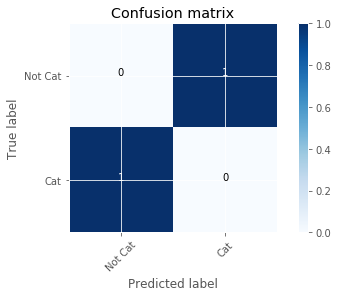

In [7]:
%matplotlib inline

# test de la fonction
from sklearn.metrics import confusion_matrix
from imgpred import gvutils
import matplotlib.pyplot as plt
from importlib import reload
reload(gvutils)

gvutils.imgs_stats("images")

N = 4
class H:
    history = {
        "loss": [1,2,3,4],
        "val_loss": [1,2,3,3],
        "acc": [4,3,2,2],
        "val_acc": [4,3,2,1]
    }
gvutils.print_save_plot(N, H, "reporting/plot_XX.png")

imgs = {
    "tp": [("tmp_img/cat/google00000.jpg","Cat: 95.2")],
    "tn": [("tmp_img/not_cat/ukbench00000.jpg","Cat: 9.2")],
    "fp": [("tmp_img/not_cat/ukbench00001.jpg","Cat: 65.2")],
    "fn": [("tmp_img/cat/google00001.jpg","Cat: 5.2")]
}
gvutils.save_confusion_matrix_samples(imgs, "reporting/conf_trial.png")
plt.show()
gvutils.plot_confusion_matrix(confusion_matrix([0,1], [1,0]), classes=["Not Cat", "Cat"])
plt.show()